In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#df=pd.read_csv('/kaggle/input/name_kaggle_competition/name_file.csv')
df=pd.read_csv("all_v2.csv")

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime

In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
df['time']=pd.to_datetime(df['time'],format='%H:%M:%S').dt.time

In [7]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


In [8]:
df.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [10]:
df1 = df.sort_values('price', ascending=False)

In [11]:
df1

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
3601118,2147483647,2020-04-14,17:48:35,57.160321,65.669313,3991,0,9,10,1,44.20,18.12,11
1142170,2147483647,2019-02-13,18:13:38,55.915609,37.773242,81,3,1,12,2,50.00,8.00,1
1396657,2089477704,2019-03-19,10:29:50,45.049906,38.937528,2843,2,5,25,3,95.86,15.00,11
1053295,2089477704,2019-02-01,08:52:19,45.060021,38.941161,2843,2,5,25,3,95.86,15.00,11
1528596,2083290000,2019-04-03,05:31:42,54.947786,82.970996,9654,4,9,10,2,63.00,12.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852873,-2114150296,2019-05-24,05:23:01,55.017672,83.003522,9654,1,8,10,3,87.39,13.00,11
3816852,-2114967296,2020-06-01,11:44:35,54.935003,82.907332,9654,3,2,5,2,43.40,6.00,1
3829586,-2114967296,2020-06-02,04:40:33,54.935003,82.907332,9654,3,2,5,2,43.40,6.00,1
4427261,-2144967296,2020-09-22,09:30:15,54.940556,82.883895,9654,1,1,10,1,33.60,9.00,1


Drop the price below 0 and above 20.000000e+06, and rooms below 0
Sometimes, it is very difficult for us to estimate very high price in the mid city because it is evaluateded by any other reasons. So I doropped the price above 20.000000e+06.

In [12]:
df[df['price']>=20.000000e+06]

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
56,20900000,2018-05-01,13:33:09,55.730785,37.631424,3,3,6,10,3,80.00,8.20,1
399,25103560,2018-09-08,01:27:55,55.790469,37.475350,3,2,11,14,4,115.50,14.90,11
881,57100000,2018-09-08,01:52:01,55.027359,82.926903,9654,3,6,7,5,294.00,50.00,1
900,1451892000,2018-09-08,01:54:34,55.013994,83.003319,9654,1,9,10,3,59.02,45.50,11
908,1003425000,2018-09-08,01:54:43,55.013994,83.003319,9654,1,9,10,1,39.35,4.39,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476856,25000000,2021-05-01,19:46:39,55.790110,37.567486,3,2,15,15,3,62.00,7.00,1
5476877,58900000,2021-05-01,19:48:59,59.963540,30.273170,2661,2,13,14,4,196.60,32.00,1
5476949,30000000,2021-05-01,20:04:42,59.961501,30.255689,2661,2,4,8,2,92.00,21.60,1
5476954,31900000,2021-05-01,20:06:39,55.722163,37.618498,3,2,9,17,1,64.00,20.40,1


In [13]:
df[df['price'] <= 0]

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
43821,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520,1,13,22,1,38.92,17.26,11
43822,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520,1,14,22,1,38.92,17.26,11
179212,0,2018-10-01,08:59:36,53.327778,83.668570,6817,3,5,10,3,104.00,15.00,1
199895,-429242296,2018-10-04,09:21:35,55.038734,82.985600,9654,2,5,25,2,57.27,9.31,11
208483,-1744967296,2018-10-06,05:06:46,54.991330,82.882575,9654,3,4,5,2,45.00,6.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382188,-2041757296,2021-04-23,07:00:09,57.636265,39.973962,2604,3,2,4,1,41.08,9.31,11
5382595,-1794967296,2021-04-23,07:37:00,56.115619,38.416266,81,1,4,5,2,56.00,9.00,1
5398253,-1494967296,2021-04-26,05:04:58,45.111303,36.881901,2843,3,3,3,1,45.00,17.00,11
5419426,-2094967296,2021-04-27,09:05:31,58.223183,68.305352,3991,3,14,19,1,30.00,8.00,1


In [14]:
df[df['rooms'] <= 0]

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
32,2500000,2018-04-04,19:37:22,43.634694,39.727167,2843,2,2,8,-1,25.0,5.0,1
135,2991978,2018-07-31,10:33:09,59.700951,30.395886,2661,1,1,5,-1,23.6,4.6,11
289,4990050,2018-09-08,00:40:46,55.673715,37.745559,3,2,8,15,-1,25.6,4.7,11
1540,590000,2018-09-08,05:46:48,53.379848,83.706244,6817,3,3,5,-1,14.0,4.0,1
1560,670000,2018-09-08,06:08:43,53.379754,83.705463,6817,3,3,5,-1,19.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476956,6230840,2021-05-01,20:07:04,55.804736,37.750898,3,1,8,33,-1,19.6,5.0,11
5476962,4339000,2021-05-01,20:08:39,55.700399,37.960624,81,2,8,17,-1,25.0,8.0,1
5476974,7504290,2021-05-01,20:10:19,55.805465,37.714470,3,2,2,32,-1,19.9,5.8,11
5476993,7136640,2021-05-01,20:13:39,55.848186,37.561906,3,1,14,19,-1,25.2,6.5,11


In [15]:
price=df[df['price'] <= 0].index
df.drop(price,inplace=True)

In [16]:
rooms=df[df['rooms']<= 0].index
df.drop(rooms,inplace=True)

In [17]:
price_high=df[df['price']>=20.000000e+06].index
df.drop(price_high,inplace=True)

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
price,1.000000,0.193560,-0.318553,-0.362874,0.001181,0.247667,0.358992,0.335189,0.336013,0.202411,0.075621
geo_lat,0.193560,1.000000,0.122761,0.022830,-0.115764,0.041725,0.077877,0.024660,-0.013367,-0.019070,0.123059
geo_lon,-0.318553,0.122761,1.000000,0.746245,-0.174019,-0.104800,-0.149371,0.024806,-0.000522,-0.059418,0.047513
region,-0.362874,0.022830,0.746245,1.000000,-0.143370,-0.121314,-0.167393,0.012119,0.021467,-0.035276,0.092302
building_type,0.001181,-0.115764,-0.174019,-0.143370,1.000000,-0.120719,-0.191988,0.012786,0.008772,0.003452,-0.160737
level,0.247667,0.041725,-0.104800,-0.121314,-0.120719,1.000000,0.663334,-0.060169,0.046540,0.109262,0.251676
levels,0.358992,0.077877,-0.149371,-0.167393,-0.191988,0.663334,1.000000,-0.099595,0.060482,0.160234,0.393824
rooms,0.335189,0.024660,0.024806,0.012119,0.012786,-0.060169,-0.099595,1.000000,0.526564,0.083712,-0.098342
area,0.336013,-0.013367,-0.000522,0.021467,0.008772,0.046540,0.060482,0.526564,1.000000,0.226542,0.020369
kitchen_area,0.202411,-0.019070,-0.059418,-0.035276,0.003452,0.109262,0.160234,0.083712,0.226542,1.000000,0.116313


<ipython-input-19-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

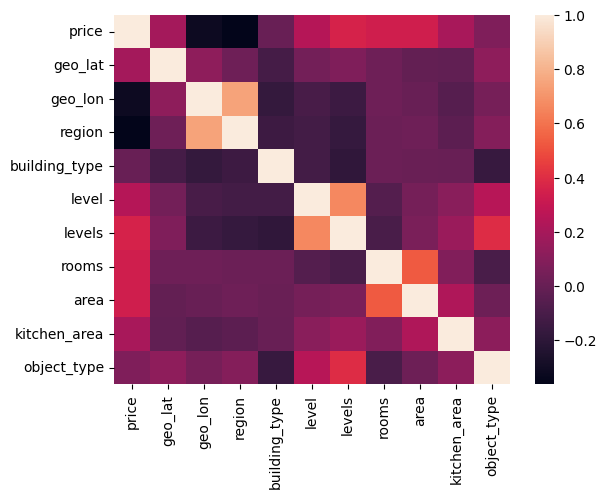

In [19]:
sns.heatmap(df.corr())

LR, Lasso and Ridge Prediction model

In [20]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [22]:
x=df.drop(['date', 'time','price'], axis=1)
y=df['price']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,random_state=123)

In [24]:
model1=LinearRegression()
model2=Lasso(alpha=1.0)
model3=Ridge(alpha=0.1)

In [25]:
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train):
    tr_x,va_x=x_train.iloc[tr_idx],x_train.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]

    model1.fit(tr_x,tr_y)
    va_pred1=model1.predict(va_x)
    score_rmse1=np.sqrt(mean_squared_error(va_y,va_pred1)).mean()
    score_mae1=mean_absolute_error(va_y,va_pred1).mean()
    score_r21=r2_score(va_y,va_pred1).mean()

print('rmse1:',score_rmse1)
print('mae1:',score_mae1)
print('R21:',score_r21)

rmse1: 2290133.88836383
mae1: 1546588.5720172534
R21: 0.42630535219665255


In [26]:
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train):
    tr_x,va_x=x_train.iloc[tr_idx],x_train.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]

    model2.fit(tr_x,tr_y)
    va_pred2=model2.predict(va_x)
    score_rmse2=np.sqrt(mean_squared_error(va_y,va_pred2)).mean()
    score_mae2=mean_absolute_error(va_y,va_pred2).mean()
    score_r22=r2_score(va_y,va_pred2).mean()

print('rmse2:',score_rmse2)
print('mae2:',score_mae2)
print('R22:',score_r22)

rmse2: 2290133.880527937
mae2: 1546588.3819117888
R22: 0.42630535612254505


In [27]:
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train):
    tr_x,va_x=x_train.iloc[tr_idx],x_train.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]

    model3.fit(tr_x,tr_y)
    va_pred3=model3.predict(va_x)
    score_rmse3=np.sqrt(mean_squared_error(va_y,va_pred3)).mean()
    score_mae3=mean_absolute_error(va_y,va_pred3).mean()
    score_r23=r2_score(va_y,va_pred3).mean()

print('rmse3:',score_rmse3)
print('mae3:',score_mae3)
print('R23:',score_r23)

rmse3: 2290133.8882931336
mae3: 1546588.5666694369
R23: 0.42630535223207233


LightGBM model

In [28]:
import lightgbm as lgb

In [29]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test)

In [30]:
params={'metric': 'rmse'}

In [34]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=5000,
               # early_stopping_rounds=100,
                #verbose=100
                )

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.294382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 4073804, number of used features: 10
[LightGBM] [Info] Start training from score 3964729.919908


In [35]:
predicted = gbm.predict(x_test)

In [36]:
def pred_map(pred_df):
    rmse = np.sqrt(mean_squared_error(pred_df['data'], pred_df['pred']))
    R2 = r2_score(pred_df['data'], pred_df['pred'])
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('data', 'pred', data=pred_df)
    ax.set_xlabel('Data Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'rmse = {}'.format(str(round(rmse, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [37]:
df_prediction = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
df_prediction.columns = ['data', 'pred']

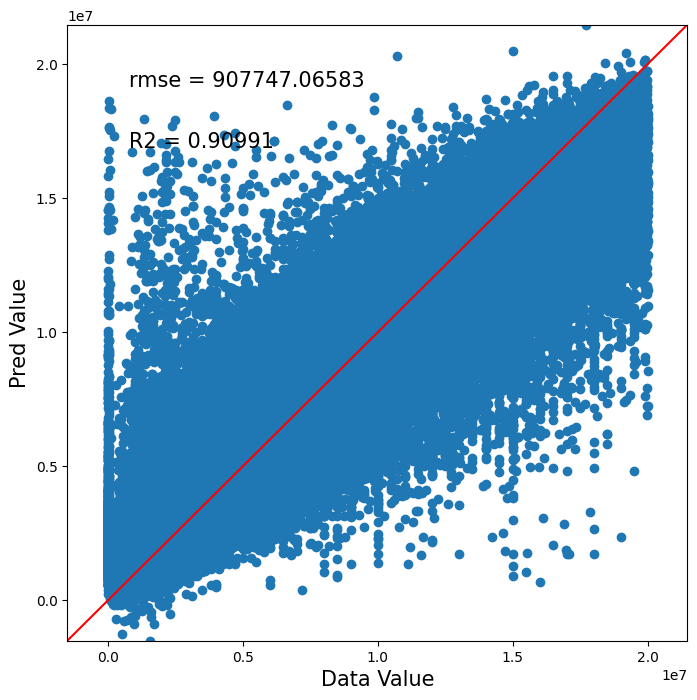

In [38]:
pred_map(df_prediction)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

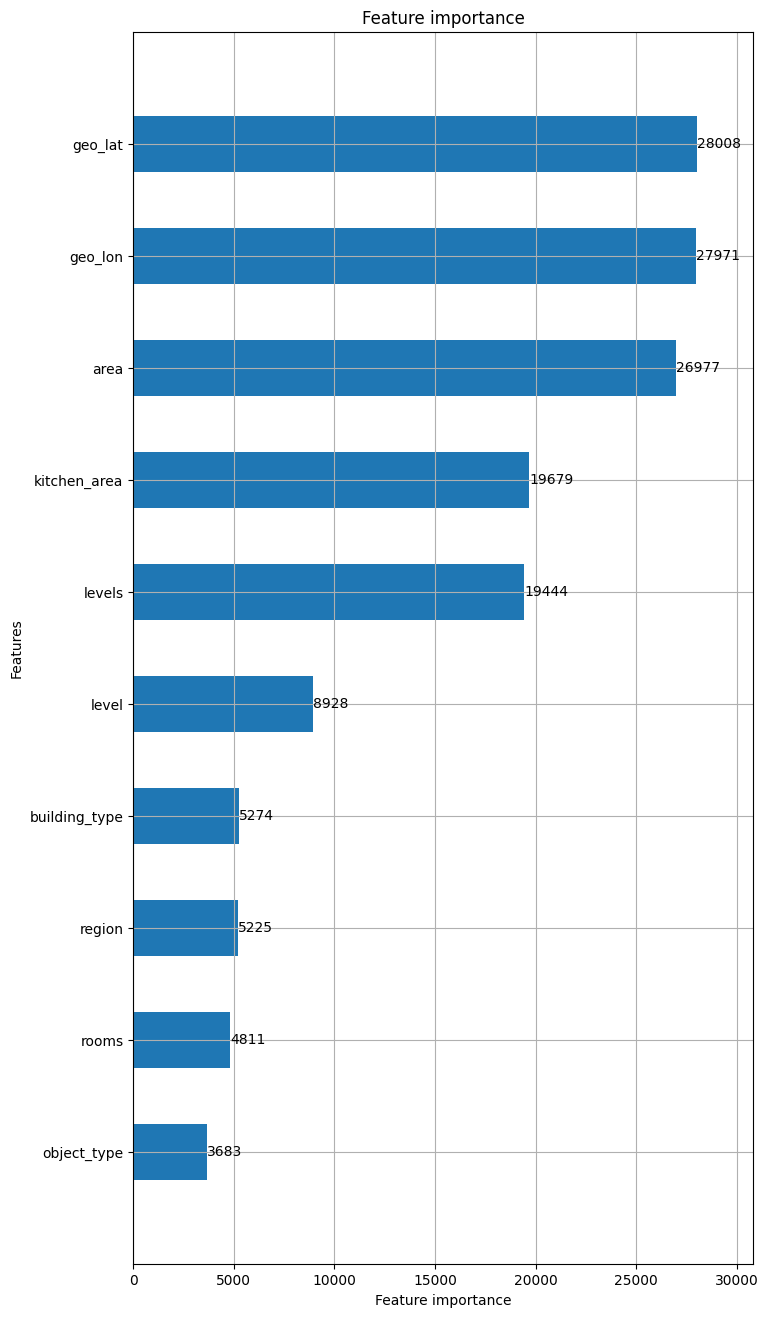

In [39]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))

By LGBM without tuning, I can get more accurate model than LR,Lasso and Ridge.
RMSE=906567
R2=0.91014